<div style="text-align: center; font-size: 30px;">
  Submitted By
</div>

<div style="text-align: center; font-size: 30px; color: green; font-weight: bold;">
  Name - Dipendu Ghosh
</div>

<div style="text-align: center; font-size: 30px; color: red; font-weight: bold;">
  Roll No- CS23M509
</div>


## CS6650W Homework 1 (Diwali 2024 Semester)
#### Smartphone based Photoplethysmography (PPG)
The task is to develop a PPG system using a smartphone device to capture blood flow related imagery data and post-process such data to estimate the pulse or heart beat rate of the subject. You need to implement various features pertaining to the above task in this notebook. Create a directory, <b><your_roll>_CS6650D24</b>. Place this notebook in that directory.

#### A. Warmup - Data Collection [10 points]
Use your smartphone’s camera to capture the blood-flow video. Turn on the flash while recording and turn it off once done. Capture the video using the maximum frame rate that is available in your phone (e.g.60 fps or 30 fps). The same holds for image resolution. The captured videos are saved on the device’s SD card. Collect 3 such videos (each exactly 10 seconds long, if longer just limit to N frames while processing, where N = 10*frames_per_second) under the following conditions. Make sure that all video capture configurations are kept the same across the cases (resolution, fps).
* resting on bed (1.mp4)
* after a moderate walk (2.mp4), and
* after a vigorous exercise (3.mp4).

Copy these videos locally to your project folder in a subdirectory "ppgvideos" - name them (1/2/3).mp4. Don’t move your finger/hand randomly or press too hard against the camera or flash while recording, little randomness is okay. Write a script to read the three videos and store the frames (2D vector of (R G B) values).

### Explanation of Each Import:

1. **OpenCV (cv2)**: This library is primarily used for image and video processing tasks, including reading, writing, and manipulating video frames and images.

2. **NumPy (np)**: A fundamental package for numerical computing in Python, it provides support for arrays, matrices, and a variety of mathematical functions to operate on these data structures.

3. **Matplotlib (plt)**: A plotting library that enables the creation of static, animated, and interactive visualizations. The pyplot module (plt) is used for creating plots.

4. **Random**: A module that implements pseudo-random number generators for various distributions, useful for creating random selections, shuffling data, or generating random numbers.

5. **SciPy Signal (find_peaks)**: This function is used to identify peaks in a one-dimensional array of data, which is particularly useful in signal processing and data analysis.

6. **Seaborn (sns)**: A data visualization library based on Matplotlib that provides a high-level interface for drawing attractive statistical graphics. It simplifies the creation of complex visualizations.

7. **SciPy Stats (norm)**: This class is used for statistical operations, especially for fitting data to a normal distribution and performing statistical analysis.

These comments will help other developers understand the purpose of each library and its role in the project, enhancing code readability and maintainability.

In [46]:
# Import the OpenCV library for image and video processing tasks
import cv2

# Import NumPy for numerical operations and array manipulations
import numpy as np

# Import Matplotlib for plotting graphs and visualizations
import matplotlib.pyplot as plt

# Import the random module to generate random numbers and selections
import random

# Import find_peaks function from SciPy's signal module to detect peaks in data
from scipy.signal import find_peaks

# Import seaborn for advanced data visualization and statistical plotting
import seaborn as sns

# Import the norm class from scipy.stats for statistical operations, particularly for fitting distributions
from scipy.stats import norm


### Code Explanation:

1. **Video Paths and Frame Storage**:
   - videoPaths: A list of strings representing the file paths of the videos to be processed.
   - videoFrames: A dictionary used to store the frames of each video. The keys ("1", "2", "3") represent the video IDs.

2. **Video Properties Storage**:
   - framesPerSecondValues, frameCountValues, frameHeightValues, frameWidthValues: These dictionaries store the FPS (Frames per second), total frame count, frame height, and frame width for each video, respectively.

3. **Video Processing Loop**:
   - **cv2.VideoCapture(videoPath)**: Opens the video file for reading.
   - The OpenCV CAP_PROP_* constants are used to retrieve the video's FPS, total number of frames, and dimensions (height and width).
   - A loop reads all frames from the video using cap.read(). If a frame is successfully read (ret is True), it is added to the videoFrames dictionary.
   - The loop continues until no more frames can be read (end of video), at which point the video capture object is released, and any OpenCV windows are closed.

4. **Logging Video Properties**:
   - After processing each video, the video path, total frame count, FPS, frame height, and frame width are printed for reference.


In [47]:
## your snippet to read the three videos, display the number of frames and resolution in each video

# List of paths to the video files
videoPaths = ["ppgvideos/1.mp4", "ppgvideos/2.mp4", "ppgvideos/3.mp4"]

# Dictionary to store the frames of each video (each key corresponds to a video ID)
videoFrames = {"1": [], "2": [], "3": []}

# Dictionaries to store video properties (FPS, frame count, frame dimensions)
framesPerSecondValues = {"1": 0, "2": 0, "3": 0}  # Frames per second for each video
frameCountValues = {"1": 0, "2": 0, "3": 0}       # Total frame count for each video
frameHeightValues = {"1": 0, "2": 0, "3": 0}      # Frame height for each video
frameWidthValues = {"1": 0, "2": 0, "3": 0}       # Frame width for each video

# Loop through each video in the list of video paths
for index, videoPath in enumerate(videoPaths):
    
    # Open the video file for reading
    cap = cv2.VideoCapture(videoPath)

    # Retrieve video properties using OpenCV's CAP_PROP constants
    framesPerSecond = cap.get(cv2.CAP_PROP_FPS)             # Frames per second of the video
    frameCount = cap.get(cv2.CAP_PROP_FRAME_COUNT)          # Total number of frames in the video
    frameWidth = cap.get(cv2.CAP_PROP_FRAME_WIDTH)          # Width of each video frame
    frameHeight = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)        # Height of each video frame

    # Store the video properties in the corresponding dictionaries using the video index as a key
    framesPerSecondValues[str(index + 1)] = framesPerSecond  # Store FPS for the current video
    frameCountValues[str(index + 1)] = frameCount            # Store total frame count
    frameHeightValues[str(index + 1)] = frameHeight          # Store frame height
    frameWidthValues[str(index + 1)] = frameWidth            # Store frame width
    
    # Loop to read all frames from the video until no more frames are available
    while cap.isOpened():
        ret, frameTemp = cap.read()  # Read the next frame from the video
        if ret:  # If a frame is successfully read
            # Add the frame to the list of frames for the current video
            videoFrames[str(index + 1)].append(frameTemp)
        else:
            # If no frame is returned, end the loop (video has ended)
            break
    
    # Release the video capture object and close any OpenCV windows
    cap.release()
    cv2.destroyAllWindows()

    # Print the video details for reference
    print(f"{videoPath}, Frame Count: {frameCount}, FPS: {framesPerSecond}, Height: {frameHeight}, Width: {frameWidth}")


ppgvideos/1.mp4, Frame Count: 732.0, FPS: 23.994029900756935, Height: 1920.0, Width: 1080.0
ppgvideos/2.mp4, Frame Count: 732.0, FPS: 23.994029900756935, Height: 1920.0, Width: 1080.0
ppgvideos/3.mp4, Frame Count: 732.0, FPS: 23.994029900756935, Height: 1920.0, Width: 1080.0


#### B. Sensing Metric [5 points]
Design your sensing metric. Note that each frame is a 2D vector of size [AxB], containing A.B pixels, where a pixel at location [i,j] is denoted by the 3-tuple [B, G, R] where B, G, and R are bytes (8 bits, range 0 - 255) representing intensity of each color - Blue, Green and Red. The frame intensity metric is an aggregate statistical measure on the pixel values. (you can even consider R, G and B streams separately or consider greyscale frames). Best to have a normalized value between zero and one. [5 points]

### Code Explanation:

1. **calculate_intensity_metric Function**:
   - **Input**: Takes in the videoIndex (to track which video is being processed) and a frame (which is a multi-channel image, usually in BGR format).
   - **Process**: 
     - Splits the frame into its Blue, Green, and Red components using cv2.split().
     - Calculates the average intensity for each channel using np.mean().
     - Normalizes each channel's intensity by dividing by 255, which is the maximum pixel value for an 8-bit image.
     - Combines the normalized intensity values using predefined weights (red has the highest weight).
   - **Output**: Returns a frameIntensityMetric, which is a single scalar value representing the intensity of the frame.

2. **Intensity Metrics Storage**:
   - A dictionary intensityMetrics is initialized to store intensity metrics for each video ("1", "2", "3" are the keys corresponding to video IDs).
   - For each video and each frame within that video, the calculate_intensity_metric function is called to compute the frame's intensity.
   - The result is stored as a dictionary containing the frame index and the calculated intensity metric.

3. **Looping Through Videos and Frames**:
   - The outer loop iterates over the videoFrames dictionary, where videoIndex is the key representing the video ID and frames is the list of frames in that video.
   - The inner loop processes each frame and calculates its intensity metric, storing the result in intensityMetrics.

4. **Optional Debugging Print**:
   - The print() statement is commented out but can be used to display the intensity metric for each frame during runtime.


In [48]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

def calculate_intensity_metric(frame):
    """
    Calculates the Frame Intensity Metric for a given video frame.
    
    Args:
    - videoIndex (str): The index of the video being processed.
    - frame (numpy array): The current video frame represented as a multi-dimensional array.
    
    Returns:
    - frameIntensityMetric (float): The calculated intensity metric for the frame.
    """
    # Split the input frame into three color channels: Blue, Green, and Red
    blue, green, red = cv2.split(frame)

    # Calculate the average intensity for each color channel
    averageIntensityRed = np.mean(red)
    averageIntensityGreen = np.mean(green)
    averageIntensityBlue = np.mean(blue)
    
    # Normalize the calculated average intensities by dividing by 255 (max value for 8-bit images)
    normalizedIntensityRed = averageIntensityRed / 255.0
    normalizedIntensityGreen = averageIntensityGreen / 255.0
    normalizedIntensityBlue = averageIntensityBlue / 255.0

    # Define weights for combining the normalized color intensities
    # Here, the red channel is given the most importance (weight 0.8), 
    # and the green and blue channels are weighted equally at 0.1.
    weightRed, weightGreen, weightBlue = 0.8, 0.1, 0.1
    
    # Compute the overall intensity metric by combining the weighted normalized color intensities
    frameIntensityMetric = (weightRed * normalizedIntensityRed + 
                            weightGreen * normalizedIntensityGreen + 
                            weightBlue * normalizedIntensityBlue)
    
    return frameIntensityMetric

# Initialize a dictionary to store the intensity metrics for each video
intensityMetrics = {"1": [], "2": [], "3": []}

# --------------------------------------------------------------------------------------------------------------#
# Main processing loop for video frames
# --------------------------------------------------------------------------------------------------------------#
# Loop through each video in the videoFrames dictionary
for videoIndex, frames in videoFrames.items():
    # Loop through each frame in the current video
    for frameIndex, frameTemp in enumerate(frames):
        # Calculate the intensity metric for the current frame
        intensityMetric = calculate_intensity_metric(frameTemp)
        
        # Store the intensity metric along with the frame index in the intensityMetrics dictionary
        intensityMetrics[str(videoIndex)].append({
            'frameIndex': frameIndex + 1,  # Frame index starts from 1 for clarity
            'intensityMetric': intensityMetric
        })
        
        # Comment/Uncomment the line below if you want to print/not print the intensity metric for each frame
        print(f"Video {videoIndex}, Frame {frameIndex + 1}, Intensity Metric: {intensityMetric:.4f}")


Video 1, Frame 1, Intensity Metric: 0.6225
Video 1, Frame 2, Intensity Metric: 0.6227
Video 1, Frame 3, Intensity Metric: 0.6232
Video 1, Frame 4, Intensity Metric: 0.6239
Video 1, Frame 5, Intensity Metric: 0.6239
Video 1, Frame 6, Intensity Metric: 0.6252
Video 1, Frame 7, Intensity Metric: 0.6252
Video 1, Frame 8, Intensity Metric: 0.6272
Video 1, Frame 9, Intensity Metric: 0.6277
Video 1, Frame 10, Intensity Metric: 0.6294
Video 1, Frame 11, Intensity Metric: 0.6305
Video 1, Frame 12, Intensity Metric: 0.6312
Video 1, Frame 13, Intensity Metric: 0.6321
Video 1, Frame 14, Intensity Metric: 0.6334
Video 1, Frame 15, Intensity Metric: 0.6336
Video 1, Frame 16, Intensity Metric: 0.6329
Video 1, Frame 17, Intensity Metric: 0.6301
Video 1, Frame 18, Intensity Metric: 0.6276
Video 1, Frame 19, Intensity Metric: 0.6256
Video 1, Frame 20, Intensity Metric: 0.6239
Video 1, Frame 21, Intensity Metric: 0.6228
Video 1, Frame 22, Intensity Metric: 0.6231
Video 1, Frame 23, Intensity Metric: 0.62

#### C. Temporal Variation of Intensity Value [10 points]
Plot your frame intensity metric vs. time for a random 5-second chunk of the three videos. The X-axis should be common for all three subplots (stacked vertically) with separate Y-axes based on your intensity metric. Appreciate the fact that vigorous exercise leads to rapid intensity variations compared to while resting. What is the BPM value for the three cases (manually counting is okay)?

### Code Explanation:

1. **Initialization**:
   - **chunkInfos**: Stores information about the chunks extracted from each video.
   - **chunks**: A dictionary to hold the actual intensity data chunks from each video.
   - **timeAxes**: Stores the time axes corresponding to the chunks for plotting purposes.
   - **plotColors**: Defines the colors to use for plotting each video’s intensity metrics for better visualization.
   - **bpmValues**: Holds the estimated BPM for each video based on detected peaks.

2. **get_random_chunk Function**:
   - This function extracts a random 5-second chunk of frames from a video.
   - It calculates the chunk size based on the frames per second (fps).
   - A random starting frame index is selected to ensure a complete chunk can be extracted.
   - The extracted chunk of intensity values is returned for further processing.

3. **Extracting Chunks**:
   - The main loop iterates through the intensityMetrics, extracting random chunks of intensity data for each video.
   - A corresponding time axis is generated for each chunk, ranging from 0 to 5 seconds.

4. **BPM Calculation**:
   - The find_peaks function detects peaks in the intensity values, and the total number of peaks is counted.
   - BPM is estimated by multiplying the number of peaks found in the 5-second chunk by 12.

5. **Output BPM Values**:
   - The estimated BPM for each video is printed to the console.

6. **Plotting**:
   - A 3x1 subplot is created to visualize the intensity metrics over time for each video.
   - The intensity values are plotted against the time axes.
   - Detected peaks are marked on the plots.
   - The layout is adjusted to ensure plots do not overlap, and the resulting plots are displayed. 


Video 1 - Estimated BPM: 60
Video 2 - Estimated BPM: 60
Video 3 - Estimated BPM: 84


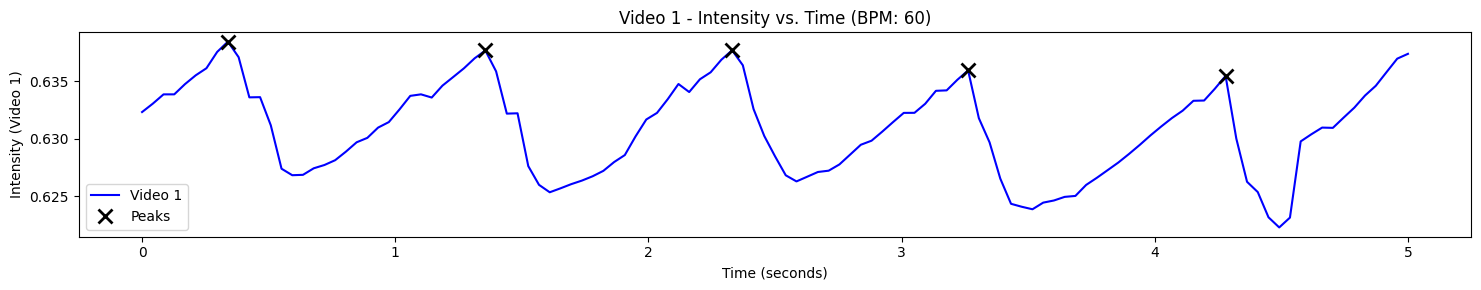

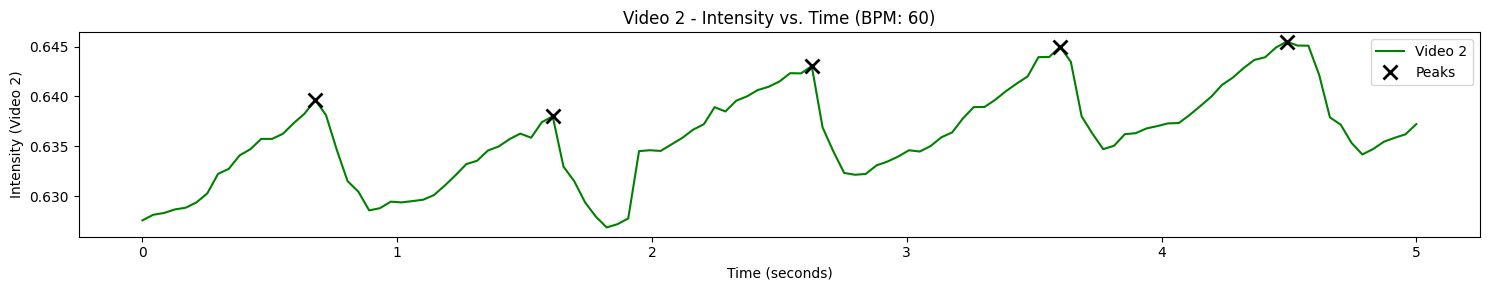

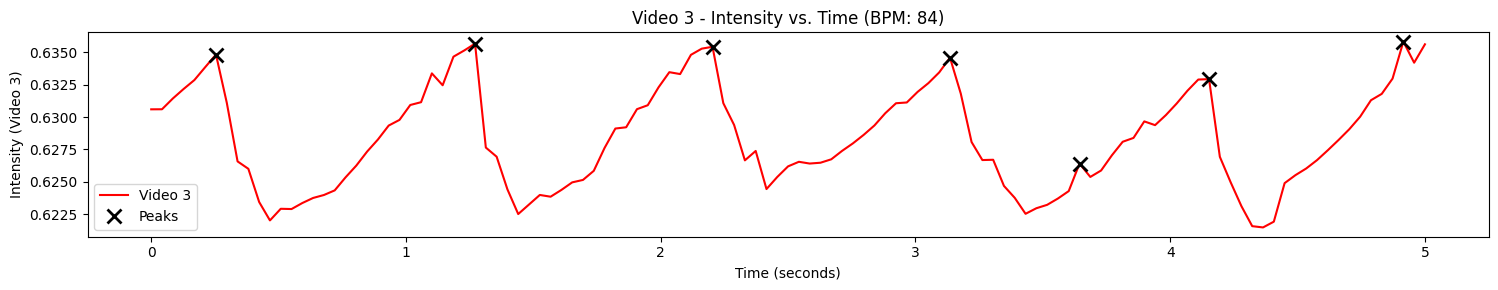

In [49]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

def get_random_chunk(frames, videoIndex, fps, duration):
    """
    Extracts a random chunk of frames from a video.

    Args:
    - frames (list): List of frames (intensity metrics) from the video.
    - videoIndex (str): The index of the video being processed.
    - fps (float): Frames per second of the video.
    - duration (int): Duration of the chunk in seconds (default is 5 seconds).

    Returns:
    - List of intensity metrics for the randomly selected chunk of frames.
    """
    # Calculate the number of frames in the chunk based on the given duration
    chunkSize = int(fps * duration)
    
    # Ensure there are enough frames to select a random chunk
    if len(frames) < chunkSize:
        raise ValueError(f"Video {videoIndex} has fewer frames than needed for a {duration}-second chunk.")
    
    # Select a random starting frame index to extract a full 5-second chunk
    startFrame = random.randint(0, len(frames) - chunkSize)
    
    # Store chunk size and starting frame in the chunkInfos dictionary for reference
    chunkInfos[str(videoIndex)] = {'chunkSize': chunkSize, 'startFrame': startFrame}

    # Return the extracted chunk of intensity values from the intensityMetrics
    return intensityMetrics[videoIndex][startFrame:startFrame + chunkSize], chunkInfos

def plot_intensity_metric_bpm():
    """
    Plots intensity metrics over time for multiple videos and marks the peaks detected 
    in the intensity data. This function is designed to visualize the temporal variation 
    of intensity metrics and highlight significant peaks, typically used to analyze 
    variations like heart rate.

    The plot contains subplots for each video, where:
    - The x-axis represents time in seconds.
    - The y-axis represents the intensity metric.
    - Peaks in intensity are marked with 'x' symbols.
    - A title for each subplot shows the corresponding video and BPM value.

    Outputs:
    - Displays the intensity metrics plot with peaks per video.
    """
    
    # Dictionary to store plot colors for each video for visualization purposes
    plotColors = {"1": 'blue', "2": 'green', "3": 'red'}

    # Iterate over each video to plot intensity metrics and mark detected peaks
    for _, videoIndex in enumerate(intensityMetrics):
        # Create a figure with 3 subplots (one for each video)
        fig, ax = plt.subplots(figsize=(15, 3))

        # Extract intensity values from the chunks data for the current video
        intensityValues = [frameData['intensityMetric'] for frameData in chunks[videoIndex]]
        
        # Plot intensity values over time for the current video
        ax.plot(timeAxes[videoIndex], intensityValues, color=plotColors[videoIndex], label=f"Video {videoIndex}")
        
        # Detect peaks in the intensity data using find_peaks, based on frame rate (0.5-second minimum distance)
        peaks, _ = find_peaks(intensityValues, distance=framesPerSecondValues[videoIndex] * 0.5)
        
        # Mark the detected peaks on the plot with black 'x' markers
        ax.plot(timeAxes[videoIndex][peaks], np.array(intensityValues)[peaks], "x", color='black', label="Peaks", markersize=10, markeredgewidth=2)
 
        # Set the x-axis label for each subplot to indicate the time
        ax.set_xlabel(f"Time (seconds)")

        # Set the y-axis label for each subplot to indicate the intensity metric
        ax.set_ylabel(f"Intensity (Video {videoIndex})")
        
        # Set the title for each subplot, including the video index and its corresponding BPM value
        ax.set_title(f"Video {videoIndex} - Intensity vs. Time (BPM: {bpmValues[videoIndex]})")
        
        # Display a legend showing the plot labels (video number and peaks)
        ax.legend()

        # Adjust the layout to ensure the subplots don't overlap and display the final plot
        plt.tight_layout()
        plt.show()

# Initialize a dictionary to store chunk information for each video
chunkInfos = {"1": [], "2": [], "3": []}

# Create dictionaries to store the extracted chunks
chunks = {"1": [], "2": [], "3": []}
# Time axes for each video
timeAxes = {"1": [], "2": [], "3": []}

# Dictionary to store estimated BPM (beats per minute) values for each video
bpmValues = {"1": 0, "2": 0, "3": 0}

# Duration of each chunk. This can be modified as per requirement
duration = 5
# --------------------------------------------------------------------------------------------------------------#
# Main processing loop for video frames
# --------------------------------------------------------------------------------------------------------------#
# Extract random 5-second chunks from the intensity metrics for each video
for videoIndex, frames in intensityMetrics.items():
    # Get a random chunk of intensity metrics for the current video
    chunks[videoIndex], chunkInfos = get_random_chunk(frames, videoIndex, framesPerSecondValues[videoIndex], duration)

    # Create a time axis for the extracted chunk, ranging from 0 to 5 seconds
    timeAxes[videoIndex] = np.linspace(0, 5, len(chunks[videoIndex]))

    # Extract intensity values from the chunk for peak detection
    intensityValues = [frameData['intensityMetric'] for frameData in chunks[videoIndex]]
    
    # Find peaks in the intensity values to estimate BPM. The fps is multiplied by 0.5 so that all peaks close 
    # to the one selected are discarded and only something at a proper distance is taken. 
    # Why 0.5 sec? Assuming every half a second a the heart beats
    peaks, _ = find_peaks(intensityValues, distance=framesPerSecondValues[videoIndex] * 0.5)
    totalPeaks = len(peaks)
    
    # Estimate BPM based on the number of detected peaks in the 5-second chunk
    bpmValues[videoIndex] = totalPeaks * 12  # Multiply by 12 to convert to BPM (60 seconds / 5 seconds)

# Output the estimated BPM values for each video
for videoIndex, bpm in bpmValues.items():
    print(f"Video {videoIndex} - Estimated BPM: {bpm}")

# Plot the intensity metrics over time for the three videos
plot_intensity_metric_bpm()


#### D. Likelihood Distributions [20 marks]
In the 5-second chunks taken above, choose 20 frames where your sensing metric is close to the local maximum (Case1), and 20 frames where it is close to the local minimum (Case2). Plot the histograms on "R", "G" and "B" values for each pixel in the 20 frames for the two cases 1 and 2. For each video there will be 3 figures, each for "R", "G" and "B". Which one produces the most separable distributions?

### Code Explanation:

1. **select_extreme_frames(intensityChunk, chunkInfo, videoIndex, numFrames=20)**
   - **Purpose**: Selects frames with minimum and maximum intensity metrics from a given chunk of frames.
   - **Parameters**: 
     - intensityChunk: List of intensity metrics.
     - chunkInfo: Additional information about the chunk (not directly used).
     - videoIndex: Index of the video being processed.
     - numFrames: Number of frames to select near the extremes (default is 20).
   - **Returns**: Lists of frames near the maximum and minimum intensities, along with their indices.

2. **extract_rgb_values_histogram_1D(frames, videoIndex)**
   - **Purpose**: Extracts the RGB values from selected frames and returns them as flattened arrays.
   - **Parameters**: 
     - frames: List of frames to extract RGB values from.
     - videoIndex: Index of the video being processed.
   - **Returns**: Flattened arrays of red, green, and blue pixel intensities.

3. **plot_local_min_max(minFrames, maxFrames, minIndices, maxIndices, intensityChunk, videoIndex)**
   - **Purpose**: Plots the local minimum and maximum intensity metrics over time for a specific video.
   - **Parameters**: 
     - minFrames: List of frames with minimum intensity metrics.
     - maxFrames: List of frames with maximum intensity metrics.
     - minIndices: Indices of the minimum intensity frames.
     - maxIndices: Indices of the maximum intensity frames.
     - intensityChunk: Intensity metrics for the current chunk.
     - videoIndex: Index of the video being processed.
   - **Returns**: None (displays a plot).

4. **plot_histograms(redMax, greenMax, blueMax, redMin, greenMin, blueMin, videoIndex)**
   - **Purpose**: Plots histograms of RGB intensity distributions for maximum and minimum frames.
   - **Parameters**: 
     - redMax, greenMax, blueMax: Flattened arrays of RGB intensities from maximum frames.
     - redMin, greenMin, blueMin: Flattened arrays of RGB intensities from minimum frames.
     - videoIndex: Index of the video being processed.
   - **Returns**: None (displays histograms).

5. **Main Loop for Frame Selection and Plotting**
   - **Purpose**: Iterates through each video to select frames near maxima and minima, extract RGB values, and plot relevant data.
   - **Key Operations**: 
     - Retrieves intensity values for a chunk of frames.
     - Calls select_extreme_frames to get maximum and minimum frames.
     - Extracts RGB values using extract_rgb_values_histogram_1D.
     - Calls plot_local_min_max and plot_histograms to visualize the data.

### General Summary
The provided code processes video frames by selecting extreme intensity values, extracting RGB pixel intensities, and plotting both the intensity over time and histograms of the RGB distributions for selected frames. It enables the analysis of intensity variations in the video, facilitating insights into the visual data captured.

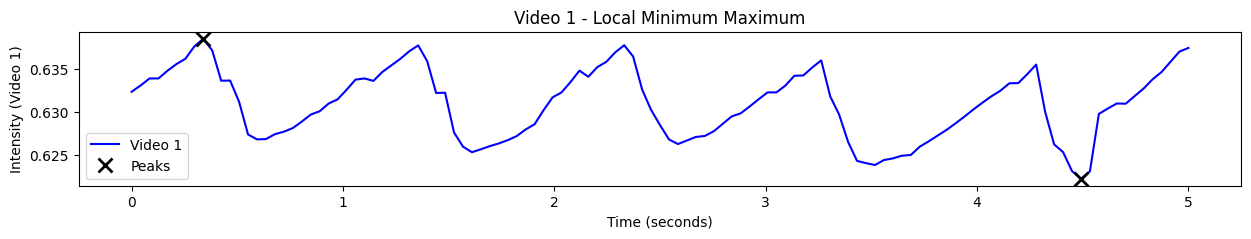

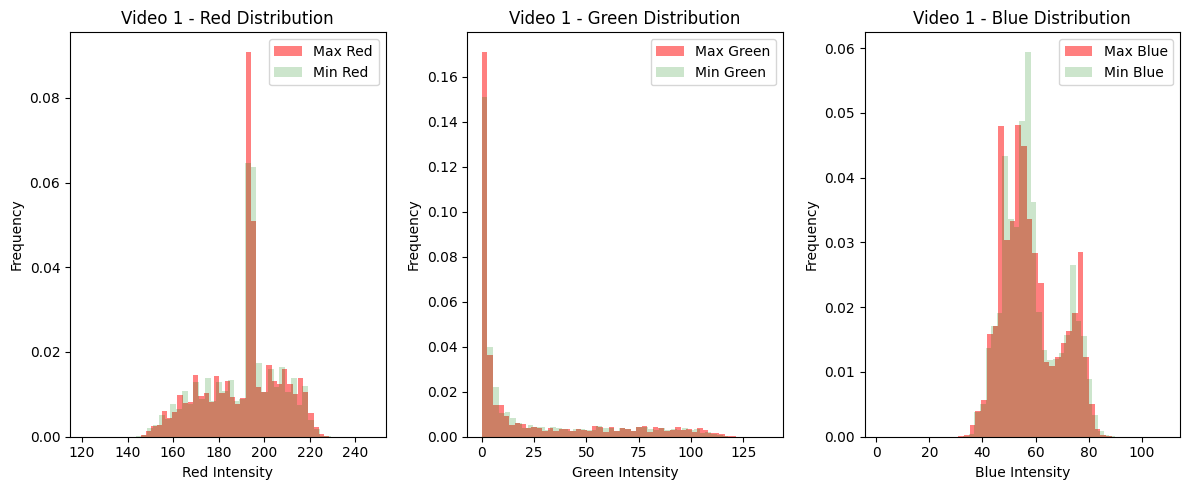

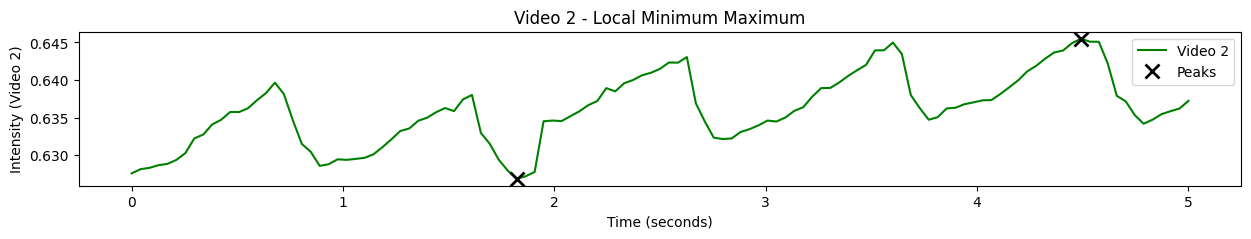

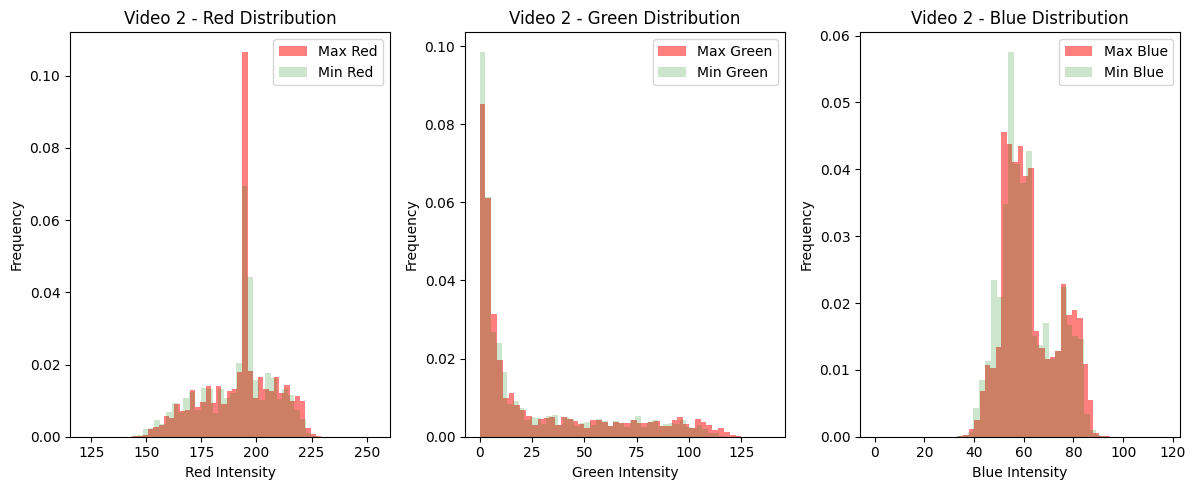

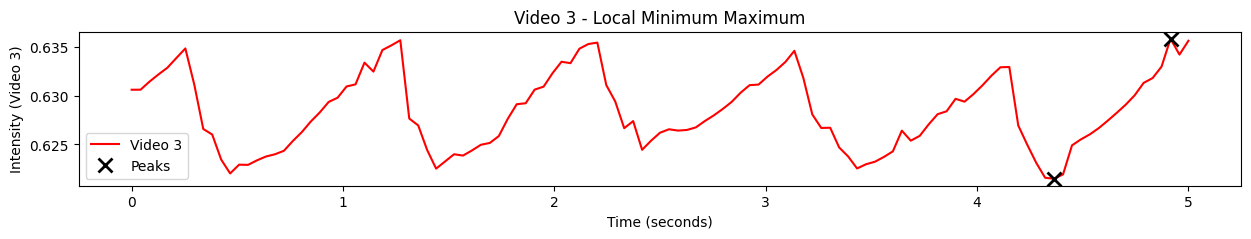

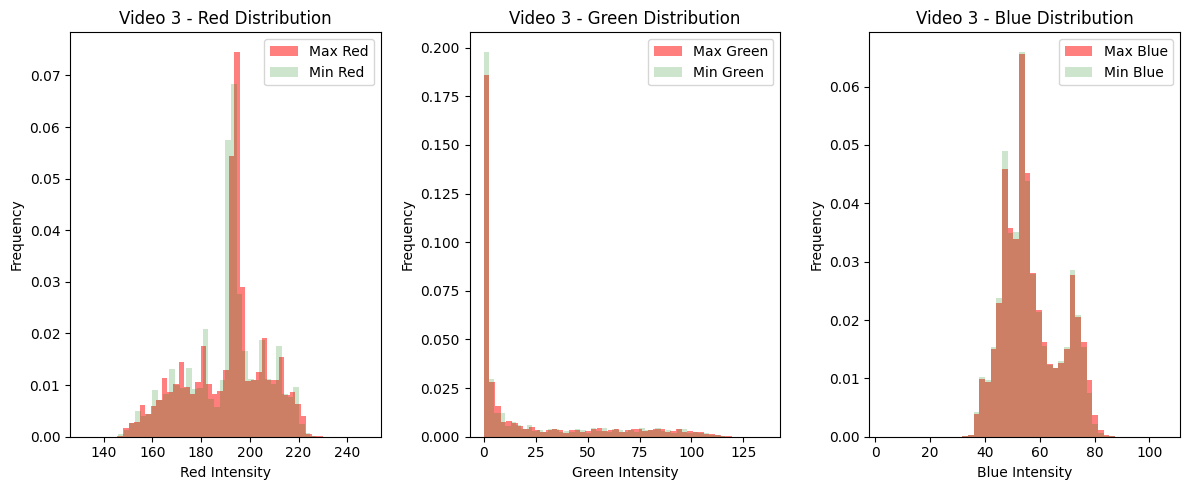

In [50]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

def select_extreme_frames(intensityChunk, chunkInfo, videoIndex, numFrames=20):
    """
    Selects frames with the minimum and maximum intensity metrics from a given intensity chunk.

    Parameters:
    - intensityChunk: List of intensity metrics for the chunk of frames.
    - chunkInfo: Information about the chunk (not used directly in this function).
    - videoIndex: Index of the video being processed.
    - numFrames: Number of frames to select near the minimum and maximum intensity (default is 20).

    Returns:
    - maxFrames: List of frames with intensity values near the maximum.
    - minFrames: List of frames with intensity values near the minimum.
    - maxIndex: Index of the frame with the maximum intensity.
    - minIndex: Index of the frame with the minimum intensity.
    """
    # Find the frame with the minimum intensity metric and get its original index
    minIndex, minPair = min(enumerate(intensityChunk), key=lambda x: x[1]['intensityMetric'])
    minFrameIndex = minPair['frameIndex']

    # Find the frame with the maximum intensity metric and get its original index
    maxIndex, maxPair = max(enumerate(intensityChunk), key=lambda x: x[1]['intensityMetric'])
    maxFrameIndex = maxPair['frameIndex']

    # Select frames sorted by proximity to the minimum frame index
    minFrames = sorted(intensityChunk, key=lambda x: abs(x['frameIndex'] - minFrameIndex))[:numFrames]

    # Select frames sorted by proximity to the maximum frame index
    maxFrames = sorted(intensityChunk, key=lambda x: abs(x['frameIndex'] - maxFrameIndex))[:numFrames]

    return maxFrames, minFrames, maxIndex, minIndex

def extract_rgb_values_histogram_1D(frames, videoIndex):
    """
    Extracts the RGB values from selected frames and returns them as flattened arrays.

    Parameters:
    - frames: List of frames to extract RGB values from.
    - videoIndex: Index of the video being processed.

    Returns:
    - redValues: Flattened array of red pixel intensities.
    - greenValues: Flattened array of green pixel intensities.
    - blueValues: Flattened array of blue pixel intensities.
    """
    # Check if there are no frames selected
    if len(frames) == 0:
        return np.array([]), np.array([]), np.array([])

    redValues, greenValues, blueValues = [], [], []
    totalBluePixels = 0
    totalGreenPixels = 0
    totalRedPixels = 0

    # Loop through each selected frame to extract RGB values
    for frame in frames:
        frameIndex = frame['frameIndex']  # Get the index of the current frame
        frameTemp = videoFrames[videoIndex][frameIndex]  # Retrieve the frame from the video

        # Split the frame into its RGB components
        blue, green, red = cv2.split(frameTemp)

        # Get the dimensions of each color channel
        blueHeight, blueWidth = blue.shape
        greenHeight, greenWidth = green.shape
        redHeight, redWidth = red.shape

        # Count total pixels for each channel
        totalBluePixels += blueHeight * blueWidth
        totalGreenPixels += greenHeight * greenWidth
        totalRedPixels += redHeight * redWidth

        # Flatten and append the RGB values to their respective lists
        redValues.append(red.ravel())
        greenValues.append(green.ravel())
        blueValues.append(blue.ravel())

    # Return concatenated RGB values as flattened arrays
    return np.concatenate(redValues), np.concatenate(greenValues), np.concatenate(blueValues)

def plot_local_min_max(minIndices, maxIndices, intensityChunk, videoIndex):
    """
    Plots the local minimum and maximum intensity metrics over time for a specific video.

    Parameters:
    - minFrames: List of frames with minimum intensity metrics.
    - maxFrames: List of frames with maximum intensity metrics.
    - minIndices: Indices of the minimum intensity frames.
    - maxIndices: Indices of the maximum intensity frames.
    - intensityChunk: Intensity metrics for the current chunk.
    - videoIndex: Index of the video being processed.

    Outputs:
    - Displays the intensity metrics plot with local minimum and maximum for R, G, B per video.
    """

    # Dictionary to store plot colors for each video for visualization purposes
    plotColors = {"1": 'blue', "2": 'green', "3": 'red'}
    
    # Create a new figure and axis for the plot
    fig, ax = plt.subplots(figsize=(15, 2))

    # Plot the intensity metrics over time for the current video
    intensityValues = [frameData['intensityMetric'] for frameData in intensityChunk]
    ax.plot(timeAxes[videoIndex], intensityValues, color=plotColors[videoIndex], label=f"Video {videoIndex}")

    # Mark the locations of the min and max intensity points
    ax.plot(timeAxes[videoIndex][[minIndices[videoIndex], maxIndices[videoIndex]]], 
        np.array(intensityValues)[[minIndices[videoIndex], maxIndices[videoIndex]]], 
        "x", color='black', label="Peaks", markersize=10, markeredgewidth=2)

    # Set Y-axis label for intensity
    ax.set_ylabel(f"Intensity (Video {videoIndex})")

    # Set X-axis label for time
    ax.set_xlabel("Time (seconds)")

    # Set title for the plot
    ax.set_title(f"Video {videoIndex} - Local Minimum Maximum")

    # Enable legend
    ax.legend()

    # Display the plot
    plt.show()

def plot_histograms(redMax, greenMax, blueMax, redMin, greenMin, blueMin, videoIndex):
    """
    Plots histograms of RGB intensity distributions for maximum and minimum frames 
    of a video. Each RGB channel's histogram is plotted separately, showing the 
    distribution of intensities for both maximum and minimum frames.

    Parameters:
    - redMax: Flattened array of red intensities from maximum frames.
    - greenMax: Flattened array of green intensities from maximum frames.
    - blueMax: Flattened array of blue intensities from maximum frames.
    - redMin: Flattened array of red intensities from minimum frames.
    - greenMin: Flattened array of green intensities from minimum frames.
    - blueMin: Flattened array of blue intensities from minimum frames.
    - videoIndex: Index of the video being processed (used for labeling).

    Outputs:
    - Displays the histogram plot of minimum and maximum of R, G, B separately per video
    """
    
    # Check if there is enough data to plot histograms for this video
    if len(redMax) == 0 or len(redMin) == 0:
        print(f"Not enough data for Video {videoIndex} to plot histograms.")
        return  # Exit the function if there isn't enough data to plot
    
    # RGB channel names and their corresponding colors
    channels = ['Red', 'Green', 'Blue']  # Channel names for labeling

    # Create a figure with 3 subplots (one for each RGB channel)
    _, axs = plt.subplots(1, 3, figsize=(12, 5))

    # Loop through each channel (Red, Green, Blue) and plot their histograms
    for i, (max_vals, min_vals) in enumerate(zip([redMax, greenMax, blueMax], [redMin, greenMin, blueMin])):
        
        # Plot histogram for maximum intensity values for the current channel
        axs[i].hist(max_vals, bins=50, color='red', alpha=0.5, label=f'Max {channels[i]}', density=True)
        
        # Plot histogram for minimum intensity values for the current channel
        axs[i].hist(min_vals, bins=50, color='green', alpha=0.2, label=f'Min {channels[i]}', density=True)
        
        # Set title and labels for the current subplot
        axs[i].set_title(f"Video {videoIndex} - {channels[i]} Distribution")  # Title shows the video index and channel
        axs[i].set_xlabel(f"{channels[i]} Intensity")  # X-axis label for intensity
        axs[i].set_ylabel("Frequency")  # Y-axis label for frequency
        
        # Display the legend to distinguish between max and min intensities
        axs[i].legend()

    # Adjust the layout to prevent subplot overlap
    plt.tight_layout()

    # Display the figure with histograms
    plt.show()

# Create dictionaries to store maximum and minimum frames and their indices for each video
maxFrames = {}
minFrames = {}
maxIndices = {}
minIndices = {}

# --------------------------------------------------------------------------------------------------------------#
# Main processing loop for video frames
# --------------------------------------------------------------------------------------------------------------#
# For each video, select frames near maxima and minima and plot histograms
for videoIndex in videoFrames:
    # Get intensity values for the 5-second chunk
    intensityChunk = chunks[videoIndex]
    chunkInfo = chunkInfos[videoIndex]

    # Select frames near maxima and minima
    maxFrame, minFrame, max_index, min_index = select_extreme_frames(intensityChunk, chunkInfo, videoIndex)

    # Store maxFrames and minFrames for the given videoIndex
    maxFrames[videoIndex] = maxFrame
    minFrames[videoIndex] = minFrame
    maxIndices[videoIndex] = max_index
    minIndices[videoIndex] = min_index

    # Extract R, G, B values for the selected frames
    redMax, greenMax, blueMax = extract_rgb_values_histogram_1D(maxFrame, videoIndex)
    redMin, greenMin, blueMin = extract_rgb_values_histogram_1D(minFrame, videoIndex)

    # Plot local min and max intensity over time
    plot_local_min_max(minIndices, maxIndices, intensityChunk, videoIndex)

    # Plot histograms for R, G, B distributions
    plot_histograms(redMax, greenMax, blueMax, redMin, greenMin, blueMin, videoIndex)


#### E. Threshold Based Detection and ROC curve [25 marks]
Only consider the "R" channel for analysis. Suppose, we just use a single pixel (uniformly randomly chosen in the frame) to detect whether the frame belongs to case 1 or case 2. You can denote the "Case 1" to be the POSITIVE event/hypothesis and "Case 2" to be the NEGATIVE event/null hypothesis. For every threshold value, for every frame, choose 500 random pixels. Compute the "Probability of Detection" ($P_D$) and "Probability of False Alarm" ($P_{FA}$). Note that you have (20 + 20) = 40 frames, and 500 detections per frame, i.e., 20000 total detections. Plot the $ROC$ curve. Which one has the best ROC curve (Dataset 1, 2 or 3)?

### Detailed Summary of the Code

This code implements a comprehensive analysis of video frames for evaluating a classification algorithm's performance using the Receiver Operating Characteristic (ROC) curve. The steps involved in this analysis are as follows:

1. **Function Definitions**:
   - **compute_auc(pfa, pd)**: This function calculates the Area Under the Curve (AUC) for the ROC curve using the trapezoidal rule. It accepts two arrays: one for the probabilities of false alarm (PFA) and another for the probabilities of detection (PD). It sorts the PFA values and corresponding PD values, and then computes the AUC based on these sorted arrays.
  
   - **compute_roc(redPixelsMax, redPixelsMin, thresholds, videoIndex)**: This function computes the true positive rates (Pd) and false positive rates (Pfa) for a given set of pixel values representing maximum and minimum intensity frames. It first fits normal distributions to the pixel values of both maximum and minimum frames, calculates the likelihoods for each hypothesis, and then evaluates the classification performance across specified thresholds. It returns lists of Pd, Pfa, and the corresponding AUC.

   - **extract_rgb_values_2D(frames, videoIndex)**: This function extracts the Red, Green, and Blue (RGB) channel values from the selected frames of a video. It returns three lists corresponding to the red, green, and blue channels of the frames.

   - **random_pixel_selection(frames, numPixels=500)**: This function randomly selects a specified number of pixels from each frame. It returns a concatenated array of selected pixel values and its row and column index, which will be used in the classification analysis.

   - **plot_roc_curves(pd, pfa, auc)**: This function visualizes the ROC curve based on the calculated Pd and Pfa values. It creates a plot that illustrates the trade-off between the true positive rate and the false positive rate, along with a diagonal reference line for random guessing. The AUC score is included in the plot legend.

2. **Processing Video Data**:
   - The main processing loop iterates through each video in a predefined list (videoFrames). For each video:
     - The red channel frames are extracted for both maximum and minimum intensity cases using the extract_rgb_values_2D function.
     - A random selection of 500 pixels is made from each frame in both the maximum and minimum cases via the get_red_pixels_max_min function.
     - The pixel values are stored in a dictionary for later reference.

3. **ROC Curve Calculation**:
   - The compute_roc function is called with the selected pixel values and a predefined set of thresholds. This function computes the Pd and Pfa for each threshold and calculates the AUC score.

4. **ROC Curve Visualization**:
   - The plot_roc_curves function is invoked to visualize the ROC curve for each video, clearly showing the relationship between Pfa and Pd along with the computed AUC score.

5. **Output Summary**:
   - After processing all videos, the code prints the AUC score for each video. The video with the highest AUC score is identified, indicating the best performance of the classification algorithm across the analyzed video frames.

6. **Conclusion**:
   - This analysis provides insights into the effectiveness of a pixel-based classification approach by quantifying the performance through ROC curves and AUC scores. It allows for the comparison of different videos to assess which yields the best classification outcomes, ultimately aiding in the evaluation and tuning of video analysis techniques.

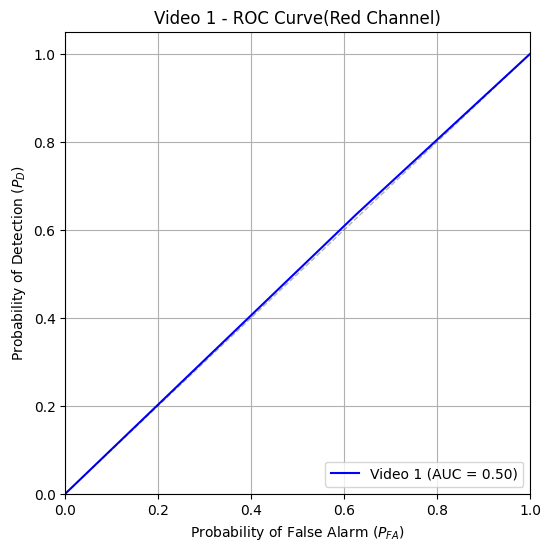

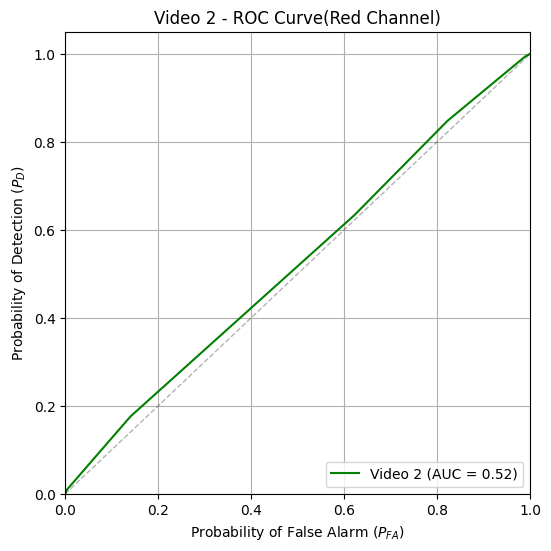

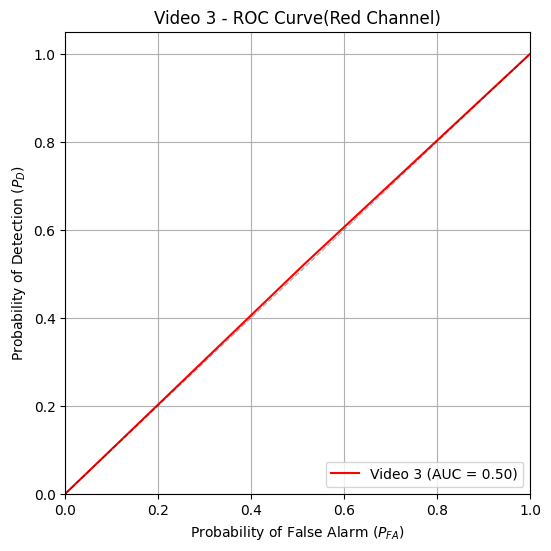

Video 1 AUC Score: 0.50
Video 2 AUC Score: 0.52
Video 3 AUC Score: 0.50

The video with the best ROC curve (highest AUC) is Video 2 with an AUC score of 0.52


In [51]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

def compute_auc(pfa, pd):
    """
    Compute the Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve.
    
    Parameters:
    - pfa: List or array of probabilities of false alarm (PFA).
    - pd: List or array of probabilities of detection (PD).

    Returns:
    - auc: The calculated AUC value, representing the performance of the classifier.
    """
    # Convert input lists to NumPy arrays for easier manipulation
    pfa = np.array(pfa)
    pd = np.array(pd)

    # Sort pfa (Probability of False Alarm) and corresponding pd (Probability of Detection) values to ensure proper calculation
    sorted_indices = np.argsort(pfa)  # Get indices that would sort the pfa array
    pfa = pfa[sorted_indices]  # Sort pfa
    pd = pd[sorted_indices]  # Sort pd according to the sorted pfa

    # Calculate Area Under the Curve (AUC) using the trapezoidal rule
    auc = np.trapezoid(pd, pfa)  # Numerical integration to find AUC

    return auc  # Return the computed AUC

def compute_roc(redPixelsMax, redPixelsMin, thresholds, videoIndex):
    """
    Compute the Receiver Operating Characteristic (ROC) curve values including true positive rate (Pd) 
    and false positive rate (Pfa) based on pixel values from maximum and minimum frames.

    Parameters:
    - redPixelsMax: Array of pixel values from frames with maximum intensity.
    - redPixelsMin: Array of pixel values from frames with minimum intensity.
    - thresholds: List of thresholds for classification.
    - videoIndex: Index of the video being processed.

    Returns:
    - pd: List of true positive rates (Pd) for each threshold.
    - pfa: List of false positive rates (Pfa) for each threshold.
    - auc: Calculated AUC score representing the performance of the classification.
    """
    # Combine the pixel values from maximum and minimum frames
    pixelValues = np.concatenate([redPixelsMax, redPixelsMin])

    # Fit normal distributions for the maximum and minimum pixel values
    maxMu, maxStd = norm.fit(redPixelsMax)  # Mean and standard deviation for max pixel values
    minMu, minStd = norm.fit(redPixelsMin)  # Mean and standard deviation for min pixel values

    # Calculate likelihoods for both hypotheses
    pH0 = norm.pdf(pixelValues, minMu, minStd)  # Likelihood for H0 (negative event)
    pH1 = norm.pdf(pixelValues, maxMu, maxStd)  # Likelihood for H1 (positive event)

    # Initialize lists to store detection rates (Pd) and false alarm rates (Pfa) for each threshold
    pd = []
    pfa = []

    # Loop through each threshold to compute Pd and Pfa
    for threshold in thresholds:
        # Likelihood ratio test for classification
        classifications = pH1 >= threshold * pH0  # Classify based on the threshold
        
        # Compute True Positive Rate (Pd) and False Positive Rate (Pfa)
        Pd = np.sum(classifications[:len(redPixelsMax)+1]) / len(redPixelsMax)  # Detection rate for positive events
        Pfa = np.sum(classifications[-len(redPixelsMin):]) / len(redPixelsMin)  # False alarm rate for negative events

        # Store the results in lists
        pd.append(Pd)
        pfa.append(Pfa)

    # Calculate the Area Under the ROC Curve (AUC)
    auc = compute_auc(pfa, pd)

    return pd, pfa, auc  # Return detection rates, false alarm rates, and AUC

def extract_rgb_values_2D(frames, videoIndex):
    """
    Extract the Red, Green, and Blue (RGB) channel frames from the selected frames.
    
    Parameters:
    - frames: List of frames to extract RGB channels from.
    - videoIndex: Index of the video being processed.

    Returns:
    - redFrames: List of Red channel frames.
    - greenFrames: List of Green channel frames.
    - blueFrames: List of Blue channel frames.
    """
    redFrames = []
    greenFrames = []
    blueFrames = []

    # Loop through each frame to split color channels
    for frame in frames:
        frameIndex = frame['frameIndex']  # Get the index of the frame
        frameTemp = videoFrames[videoIndex][frameIndex]  # Retrieve the actual frame
        blue, green, red = cv2.split(frameTemp)  # Separate B, G, R channels
        
        # Append the red, green, and blue channels to their respective lists
        redFrames.append(red)
        greenFrames.append(green)
        blueFrames.append(blue)

    return redFrames, greenFrames, blueFrames  # Return lists of color channel frames

def random_pixel_selection(frames, numPixels=500):
    """
    Randomly select a specified number of pixels from each frame.
    
    Parameters:
    - frames: List of frames to select pixels from.
    - numPixels: Number of pixels to select from each frame.

    Returns:
    - selectedPixels: Concatenated array of randomly selected pixel values from all frames.
    - selectedPixelsRows: Concatenated array of randomly selected pixel values row index from all frames.
    - selectedPixelsCols: Concatenated array of randomly selected pixel values column index from all frames.
    """
    selectedPixels1D = [] # List to store selected pixels
    selectedPixelsRows = [] # List to store selected pixels row index
    selectedPixelsCols = [] # List to store selected pixels column index

    # Loop through each frame
    for frame in frames:
        # Get the dimensions of the frame (height, width)
        height, width = frame.shape

        # Randomly select pixels from the flattened array of pixel values
        randomIndices = np.random.choice(height * width, numPixels, replace=False)  # Select unique pixel indices
        row, col = np.unravel_index(randomIndices, frame.shape) # Select the unique row column value of the selected pixel
        selectedPixelsRows.append(row) # Store the pixel row index values for further processing
        selectedPixelsCols.append(col) # Store the pixel column index values for further processing
        selectedPixels = frame.flatten()[randomIndices] # Extract pixel values using the selected indices
        selectedPixels1D.append(selectedPixels)  # Store the pixel values dor further processing

    # Return concatenated array of selected pixel values, corresponding row and column index as well
    return np.concatenate(selectedPixels1D), np.concatenate(selectedPixelsRows), np.concatenate(selectedPixelsCols)  

def plot_roc_curves(pd, pfa, auc, videoIndex):
    """
    Plot the ROC curves based on the given probabilities of detection (Pd) and false alarm (Pfa).
    
    Parameters:
    - pd: List of true positive rates (Pd) for each threshold.
    - pfa: List of false positive rates (Pfa) for each threshold.
    - auc: The calculated AUC score representing the performance of the classifier.

    Outputs:
    - Displays the ROC curve per video
    """
    # Dictionary to store plot colors for each video for visualization purposes
    plotColors = {"1": 'blue', "2": 'green', "3": 'red'}

    # Create a new figure for the ROC curve
    plt.figure(figsize=(6, 6))
    plt.plot(pfa, pd, linestyle='-', color=plotColors[videoIndex], label=f'Video {videoIndex} (AUC = {auc:.2f})')  # Plot ROC curve
    plt.title("ROC Curve")  # Set the title
    plt.xlabel("Pfa (Probability of False Alarm)")  # Label for X-axis
    plt.ylabel("Pd (Probability of Detection)")  # Label for Y-axis
    plt.grid(True)  # Enable grid
    plt.legend()  # Display legend

    # Add diagonal reference line for random guessing
    plt.plot([0, 1], [0, 1], 'k--', lw=1, alpha=0.3)  
    plt.xlim([0.0, 1.0])  # Set X-axis limits
    plt.ylim([0.0, 1.05])  # Set Y-axis limits
    plt.xlabel("Probability of False Alarm ($P_{FA}$)")  # X-axis label
    plt.ylabel("Probability of Detection ($P_{D}$)")  # Y-axis label
    plt.title(f"Video {videoIndex} - ROC Curve(Red Channel)")  # Title with video index
    plt.legend(loc='lower right')  # Place legend at the lower right corner
    plt.grid(True)  # Enable grid
    plt.show()  # Display the plot

# Initialize dictionaries to store AUC scores and PD/PFA values for each video
aucScores = {}
pdPfaThresholds = {}  # To store PD and PFA values for each video
redPixels = {}
redPixelsRows = {}
redPixelsCols = {}

# --------------------------------------------------------------------------------------------------------------#
# Main processing loop for video frames
# --------------------------------------------------------------------------------------------------------------#
# Loop through each video to compute and plot ROC curves
for index, videoIndex in enumerate(videoFrames):
    # Extract R channel frames for maximum and minimum cases
    redMax, _, _ = extract_rgb_values_2D(maxFrames[videoIndex], videoIndex)
    redMin, _, _ = extract_rgb_values_2D(minFrames[videoIndex], videoIndex)

    # Randomly select 500 pixels from maximum and minimum frames
    redPixelsMax, redPixelsMaxRows, redPixelsMaxCols = random_pixel_selection(redMax)  # Get random pixels with indices from maximum frames
    redPixelsMin, redPixelsMinRows, redPixelsMinCols = random_pixel_selection(redMin)  # Get random pixels with indices from minimum frames

    # Store red pixels for maximum and minimum cases
    redPixels[videoIndex] = {"RedPixelsMax": redPixelsMax, "RedPixelsMin": redPixelsMin}
    redPixelsRows[videoIndex] = {"RedPixelsMaxRows": redPixelsMaxRows, "RedPixelsMinRows": redPixelsMinRows}
    redPixelsCols[videoIndex] = {"RedPixelsMaxCols": redPixelsMaxCols, "RedPixelsMinCols": redPixelsMinCols}

    # Compute ROC curve with specified thresholds
    thresholds = np.arange(0.5, 1.5, 0.1)
    pd, pfa, auc = compute_roc(redPixelsMax, redPixelsMin, thresholds, videoIndex)

    # Store AUC score for the current video
    aucScores[videoIndex] = auc

    # Store PD (true positive rate) and PFA (false positive rate) for the current video
    pdPfaThresholds[videoIndex] = {"PD": pd, "PFA": pfa, "Thresholds": thresholds}

    # Plot the ROC curve for the current video
    plot_roc_curves(pd, pfa, auc, videoIndex)

# Print AUC scores for each video
for videoIndex, aucScore in aucScores.items():
    print(f"Video {videoIndex} AUC Score: {aucScore:.2f}")

# Determine the video with the best AUC score
bestVideoId = max(aucScores, key=aucScores.get)  # Get the video index with the highest AUC score
print(f"\nThe video with the best ROC curve (highest AUC) is Video {bestVideoId} with an AUC score of {aucScores[bestVideoId]:.2f}")


#### F. Are "good" samples spatially correlated? [20 marks]
First, choose an optimal threshold, $T_{OPT}$, that best suits your data (maximize $P_D$ while minimizing $P_{FA}$, you may look into maximizing the $\frac{P_D}{P_{FA}}$ ratio). Out of the 20000 total detections above for $T_{OPT}$, can it be hypothesised that the "good" samples (true positives and true negatives) are spatially clustered in certain areas of the frame, compared to the "bad" samples (false positives and false negatives)?

### Detailed Summary

This code implements functions for determining the optimal threshold for classification, classifying samples based on that threshold, and visualizing the spatial distribution of classification results. The process involves the following steps:

1. **Classification of Samples Using Likelihood Ratio**:
   - The classify_samples function classifies red pixel samples into four categories (True Positives, False Negatives, False Positives, and True Negatives) based on a **likelihood ratio test** (LRT). The likelihoods for both positive (Max) and negative (Min) events are calculated using fitted normal distributions, and the classification is determined by comparing the likelihoods with a threshold (TOpt).

   1. **True Positives**:
      - Samples from redPixelsMax are correctly classified as positive (event detected) when the likelihood of the positive hypothesis (pH1) is greater than or equal to the likelihood of the negative hypothesis (pH0) scaled by the threshold TOpt. These samples represent true detections.
      - Condition: pH1 >= TOpt * pH0 for redPixelsMax values.

   2. **False Negatives**:
      - Samples from redPixelsMax that fail the likelihood test (i.e., pH1 < TOpt * pH0) are classified as false negatives. These samples should have been detected but were missed by the classifier, indicating undetected events.
      - Condition: pH1 < TOpt * pH0 for redPixelsMax values.

   3. **False Positives**:
      - Samples from redPixelsMin are incorrectly classified as positive when the likelihood of the positive hypothesis (pH1) is incorrectly greater than or equal to the likelihood of the negative hypothesis (pH0) scaled by TOpt. These represent background or noise falsely classified as events.
      - Condition: pH1 >= TOpt * pH0 for redPixelsMin values.

   4. **True Negatives**:
      - Samples from redPixelsMin that are correctly classified as negative (i.e., pH1 < TOpt * pH0) indicate that the classifier accurately identified the absence of an event. These samples are non-events or noise that were properly excluded.
      - Condition: pH1 < TOpt * pH0 for redPixelsMin values.



2. **Sample Classification**:
   - The classify_samples function categorizes red pixel values from maximum and minimum intensity frames into four categories based on the optimal threshold: True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN). This classification allows for an understanding of how well the algorithm performs in distinguishing between events.

3. **Spatial Correlation Visualization**:
   - The plot_spatial_correlation function generates a 2D scatter plot to visually represent the spatial locations of classified samples. The locations of TP, FN, TN, and FP are plotted in two separate subplots, allowing for a clear visual distinction between correctly and incorrectly classified samples. Each category is represented by a different color.

4. **Video Frame Processing**:
   - The main loop iterates over each video frame, retrieving relevant data such as PFA, Pd, and thresholds from precomputed dictionaries. For each video, it calculates the optimal threshold, classifies the red pixel samples, and generates random locations for each classification result to plot the spatial correlation.

5. **Random Sampling for Visualization**:
   - Random pixel locations are generated for each classification category (TP, TN, FP, FN) to ensure that the visual representation does not become cluttered. The code ensures that the number of locations plotted does not exceed the actual number of classified samples.

6. **Overall Purpose**:
   - The overall purpose of this analysis is to evaluate the performance of a classification algorithm used for video frame analysis. By calculating and visualizing the optimal threshold and its impact on classification, the code provides insights into how well the algorithm can differentiate between true events and noise, helping in the refinement and improvement of video analysis techniques.

T_Opt 0.9999999999999999


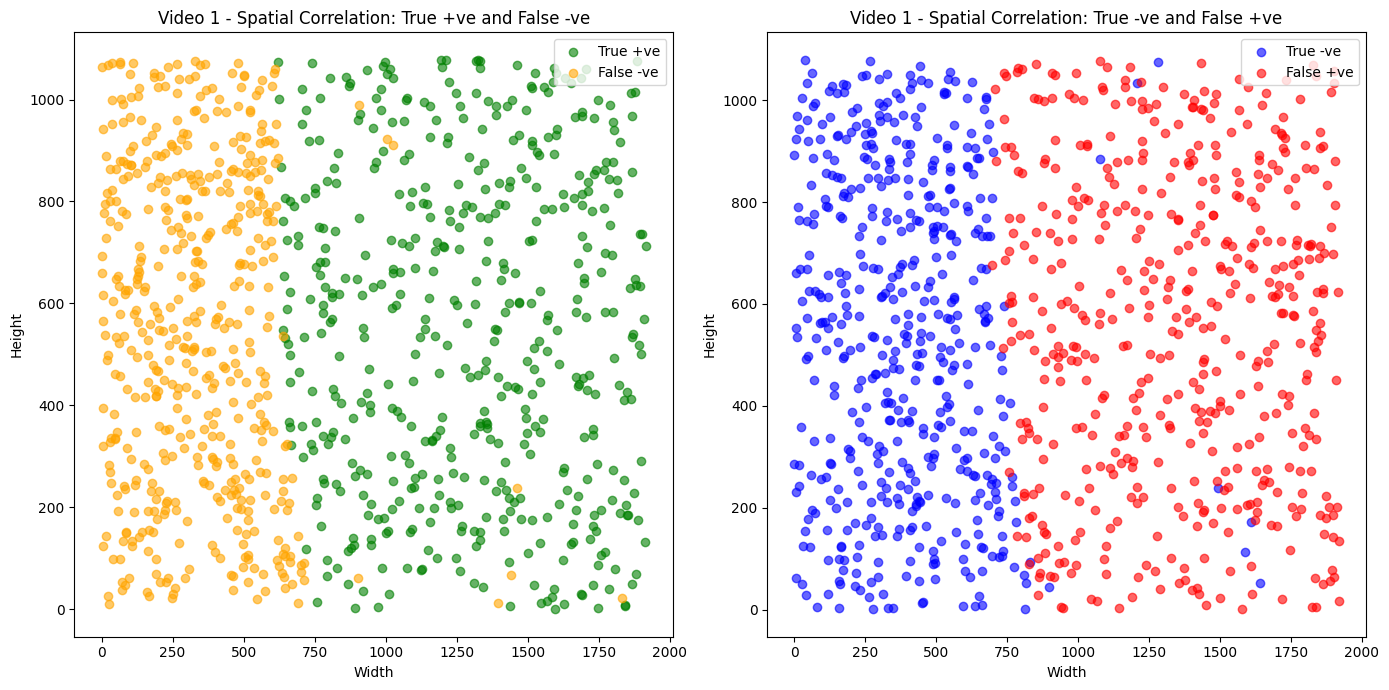

T_Opt 1.1999999999999997


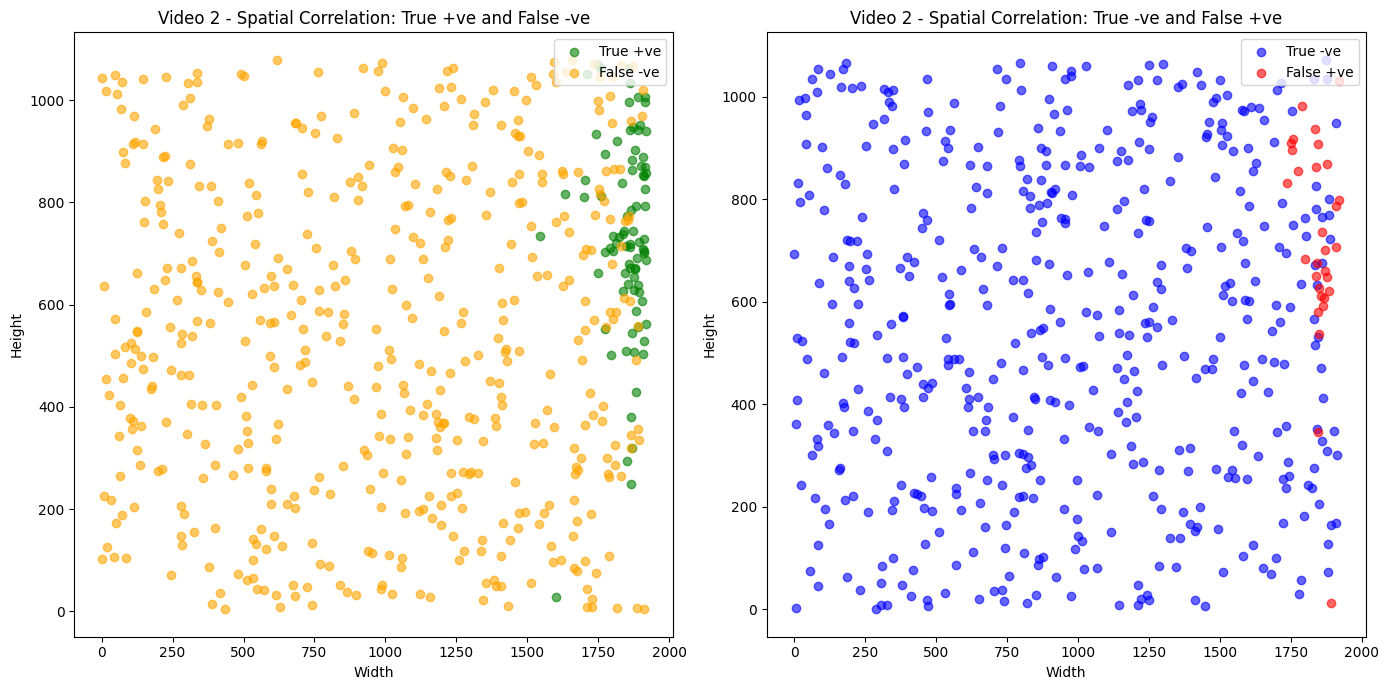

T_Opt 0.9999999999999999


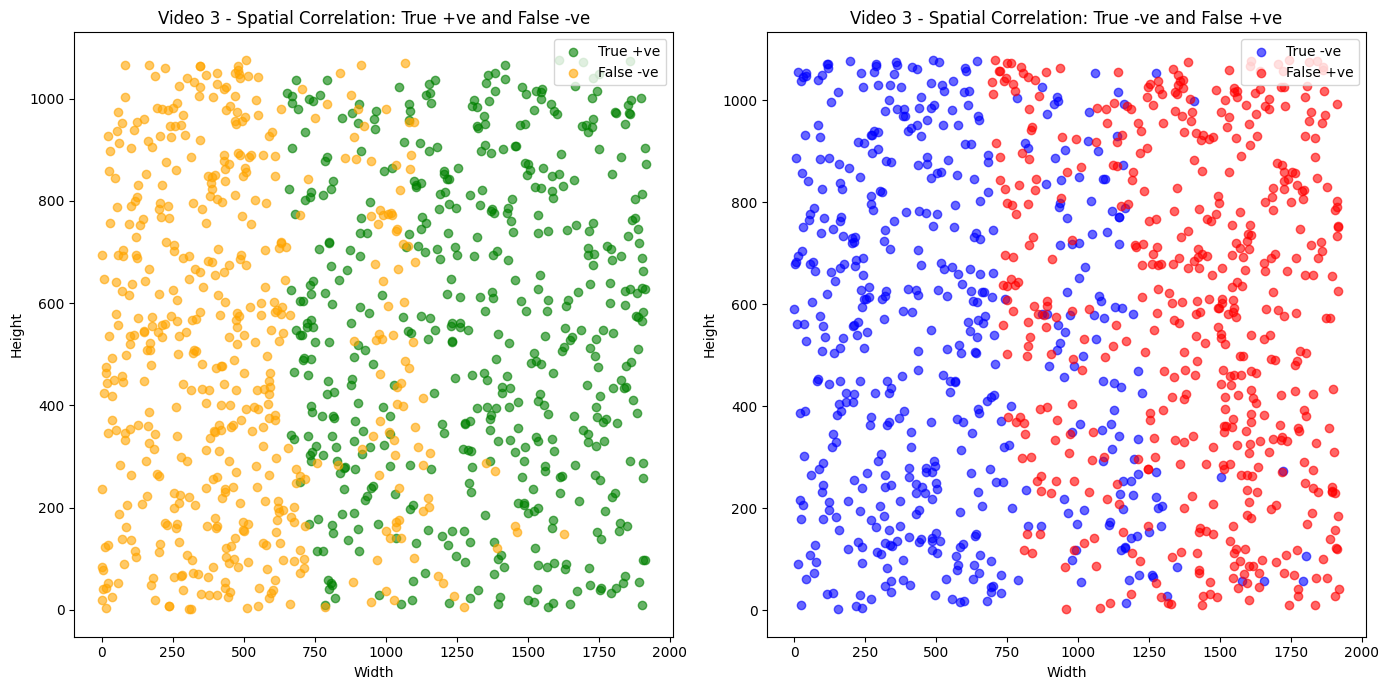

In [52]:
## put your snippet here with complete explanation in comments
## Marks will be provided based on code readability (not yourself, but others) and detailed comments

# Function to find the optimal threshold T_OPT
def find_optimal_threshold(pfa, pd, thresholds):
    """
    Calculate the optimal threshold (T_OPT) based on the maximum ratio of 
    Probability of Detection (Pd) to Probability of False Alarm (Pfa).

    Args:
        pfa (array-like): Array of probabilities of false alarm.
        pd (array-like): Array of probabilities of detection.
        thresholds (array-like): Array of threshold values corresponding to Pd and Pfa.

    Returns:
        tuple: A tuple containing the optimal threshold (TOpt), 
               maximum probability of detection (maxPd), and minimum probability of false alarm (minPfa).
    """
    # Calculate the PD/PFA ratio for each threshold
    # The below process is done to avoid division by zero
    non_zero_mask = pfa != 0
    pd_pfa_ratios = np.full_like(pfa, np.nan)
    pd_pfa_ratios[non_zero_mask] = pd[non_zero_mask] / pfa[non_zero_mask]
    pd_pfa_ratios[~non_zero_mask] = 0
    # Find the index of the maximum ratio
    optimalIdx = np.argmax(pd_pfa_ratios)
    
    # Get the optimal threshold and corresponding PD and PFA
    TOpt = thresholds[optimalIdx]
    maxPd = pd[optimalIdx]
    minPfa = pfa[optimalIdx]
    
    return TOpt, maxPd, minPfa

# Function to classify samples based on TOpt
def classify_samples(redPixelsMax, redPixelsMaxRow, redPixelsMaxCol, redPixelsMin, redPixelsMinRow, redPixelsMinCol, TOpt):
    """
    Classify samples from red pixel values into True Positives (TP), True Negatives (TN),
    False Positives (FP), and False Negatives (FN) based on the likelihood ratio test
    using the optimal threshold (TOpt).

    Args:
        redPixelsMax (array-like): Array of maximum red pixel values representing positive samples.
        redPixelsMaxRow (array-like): Array of maximum red pixel values row index representing positive samples.
        redPixelsMaxCol (array-like): Array of maximum red pixel values column index representing positive samples.
        redPixelsMin (array-like): Array of minimum red pixel values representing negative samples.
        redPixelsMinRow (array-like): Array of minimum red pixel values row index representing negative samples.
        redPixelsMinCol (array-like): Array of minimum red pixel values column index representing negative samples.
        TOpt (float): The optimal threshold for classification based on the likelihood ratio.

    Returns:
        tuple: A tuple containing four lists:
               - True Positives (TP): Samples correctly classified as positives(contains the pixel value and its index).
               - True Negatives (TN): Samples correctly classified as negatives(contains the pixel value and its index).
               - False Positives (FP): Samples incorrectly classified as positives(contains the pixel value and its index).
               - False Negatives (FN): Samples incorrectly classified as negatives(contains the pixel value and its index).
    """
    
    # Combine the pixel values from both Max and Min groups
    pixelValues = np.concatenate([redPixelsMax, redPixelsMin])
    pixelRows = np.concatenate([redPixelsMaxRow, redPixelsMinRow])
    pixelCols = np.concatenate([redPixelsMaxCol, redPixelsMinCol])

    # Fit normal distributions for the max and min red pixel values
    maxMu, maxStd = norm.fit(redPixelsMax)  # Fit for positive (Max) samples
    minMu, minStd = norm.fit(redPixelsMin)  # Fit for negative (Min) samples

    # Calculate the likelihood for H1 (positive hypothesis) using the Min distribution
    pH0 = norm.pdf(pixelValues, minMu, minStd)

    # Calculate the likelihood for H0 (negative hypothesis) using the Max distribution
    pH1 = norm.pdf(pixelValues, maxMu, maxStd)

    # Apply likelihood ratio test: classify based on whether pH1 >= (TOpt * pH0)
    classifications = pH1 >= TOpt * pH0

    # Initialize lists for storing the classified samples
    truePositives = []  # Samples classified as positive and are actually positive
    falseNegatives = []  # Samples classified as negative but are actually positive
    falsePositives = []  # Samples classified as positive but are actually negative
    trueNegatives = []  # Samples classified as negative and are actually negative

    # Loop through classifications and assign samples to the appropriate category
    for index, cls in enumerate(classifications):
        pixelData = {'pixelValue' :pixelValues[index] , 'pixelRow':pixelRows[index] , 'pixelCol':pixelCols[index]}
        if(index < len(redPixelsMax)):
            if(cls == True):
                truePositives.append(pixelData)
            else:
                falseNegatives.append(pixelData)
        else:
            if(cls == True):
                falsePositives.append(pixelData)
            else:
                trueNegatives.append(pixelData)
    
    # Return the classification results as a tuple
    return truePositives, trueNegatives, falsePositives, falseNegatives

def plot_spatial_correlation(TP, TN, FP, FN, videoIndex):
    """
    Plot the spatial correlation of classified samples in a 2D scatter plot.

    Args:
        TP (True Positives): Samples correctly classified as positives 
                             (contains pixel value and its index).
        TN (True Negatives): Samples correctly classified as negatives 
                             (contains pixel value and its index).
        FP (False Positives): Samples incorrectly classified as positives 
                             (contains pixel value and its index).
        FN (False Negatives): Samples incorrectly classified as negatives 
                             (contains pixel value and its index).
        frame_shape (tuple): Shape of the frame (height, width) for setting plot limits.

    Returns:
        None: Displays the scatter plot showing spatial correlation of classified samples.
    """
    # Generate random pixel locations for plotting, limiting sample size to 500 or less
    # Modify sampleSize to plot more or less number of pixels
    sampleSize = 500  # Set fixed sample size for plotting to avoid overcrowding
    TP = TP[0:min(sampleSize + 1, len(TP))]  # Subset of True Positives
    FN = FN[0:min(sampleSize + 1, len(FN))]  # Subset of False Negatives
    TN = TN[0:min(sampleSize + 1, len(TN))]  # Subset of True Negatives
    FP = FP[0:min(sampleSize + 1, len(FP))]  # Subset of False Positives

    # Extract pixel row and column information for each class (TP, FN, TN, FP)
    tpLocations = [(pixelData['pixelRow'], pixelData['pixelCol']) for pixelData in TP]
    fnLocations = [(pixelData['pixelRow'], pixelData['pixelCol']) for pixelData in FN]
    tnLocations = [(pixelData['pixelRow'], pixelData['pixelCol']) for pixelData in TN]
    fpLocations = [(pixelData['pixelRow'], pixelData['pixelCol']) for pixelData in FP]

    # Create a figure with two subplots (1 row, 2 columns)
    fig, axes = plt.subplots(1, 2, figsize=(14, 7))

    # First subplot: Plot True Positives (TP) and False Negatives (FN)
    ax1 = axes[0]
    ax1.set_facecolor("white")  # Set background color for clarity

    # Plot True Positives (TP) in green if they exist
    if tpLocations:
        tp_x, tp_y = zip(*tpLocations)  # Unzip row and column positions for scatter plotting
        ax1.scatter(tp_x, tp_y, color='green', alpha=0.6, label="True +ve")  # Scatter plot for TP

    # Plot False Negatives (FN) in orange if they exist
    if fnLocations:
        fn_x, fn_y = zip(*fnLocations)  # Unzip row and column positions for scatter plotting
        ax1.scatter(fn_x, fn_y, color='orange', alpha=0.6, label="False -ve")  # Scatter plot for FN

    # Set labels, title, and legend for the first subplot
    ax1.legend(loc="upper right")
    ax1.set_title(f"Video {videoIndex} - Spatial Correlation: True +ve and False -ve")  # Title showing what is being plotted
    ax1.set_xlabel("Width")  # X-axis label
    ax1.set_ylabel("Height")  # Y-axis label

    # Second subplot: Plot True Negatives (TN) and False Positives (FP)
    ax2 = axes[1]
    ax2.set_facecolor("white")  # Set background color for clarity

    # Plot True Negatives (TN) in blue if they exist
    if tnLocations:
        tn_x, tn_y = zip(*tnLocations)  # Unzip row and column positions for scatter plotting
        ax2.scatter(tn_x, tn_y, color='blue', alpha=0.6, label="True -ve")  # Scatter plot for TN

    # Plot False Positives (FP) in red if they exist
    if fpLocations:
        fp_x, fp_y = zip(*fpLocations)  # Unzip row and column positions for scatter plotting
        ax2.scatter(fp_x, fp_y, color='red', alpha=0.6, label="False +ve")  # Scatter plot for FP

    # Set labels, title, and legend for the second subplot
    ax2.legend(loc="upper right")
    ax2.set_title(f"Video {videoIndex} - Spatial Correlation: True -ve and False +ve")  # Title showing what is being plotted
    ax2.set_xlabel("Width")  # X-axis label
    ax2.set_ylabel("Height")  # Y-axis label

    # Adjust layout to avoid overlap between subplots and improve readability
    plt.tight_layout()

    # Display the scatter plot with both subplots
    plt.show()

# --------------------------------------------------------------------------------------------------------------#
# Main processing loop for video frames
# --------------------------------------------------------------------------------------------------------------#
# Loop through each video to find optiomal threshold and plot the spatial correlation scatter plot
for videoIndex in videoFrames:
    # Get the frame dimensions for the current video
    frameHeight = int(frameHeightValues[videoIndex])  # Extract frame height
    frameWidth = int(frameHeightValues[videoIndex])    # Extract frame width

    # Get the threshold and corresponding PD (Probability of Detection) and PFA (Probability of False Alarm)
    pfa = np.array(pdPfaThresholds[videoIndex]["PFA"], dtype=float)  # Convert PFA to a NumPy array
    pd = np.array(pdPfaThresholds[videoIndex]["PD"], dtype=float)    # Convert PD to a NumPy array
    thresholds = pdPfaThresholds[videoIndex]["Thresholds"]           # Extract the thresholds for classification
    
    # Find the optimal threshold (T_OPT) for each video based on PFA and PD
    T_OPT, max_pd, min_pfa = find_optimal_threshold(pfa, pd, thresholds)  # Determine T_OPT using the helper function
    print(f"T_Opt {T_OPT}")  # Print the optimal threshold for debugging

    # Get the red pixel max and min values along with their corresponding indices
    redPixelsMax = redPixels[videoIndex]["RedPixelsMax"]              # Extract maximum red pixel values
    redPixelsMaxRow = redPixelsRows[videoIndex]["RedPixelsMaxRows"]   # Extract row indices for maximum red pixels
    redPixelsMaxCol = redPixelsCols[videoIndex]["RedPixelsMaxCols"]   # Extract column indices for maximum red pixels
    redPixelsMin = redPixels[videoIndex]["RedPixelsMin"]              # Extract minimum red pixel values
    redPixelsMinRow = redPixelsRows[videoIndex]["RedPixelsMinRows"]   # Extract row indices for minimum red pixels
    redPixelsMinCol = redPixelsCols[videoIndex]["RedPixelsMinCols"]   # Extract column indices for minimum red pixels
    
    # Classify the samples based on the optimal threshold (T_OPT)
    TP, TN, FP, FN = classify_samples(redPixelsMax, redPixelsMaxRow, redPixelsMaxCol, 
                                       redPixelsMin, redPixelsMinRow, redPixelsMinCol, T_OPT)

    # Plot the spatial correlation of good (TP, TN) and bad (FP, FN) samples
    plot_spatial_correlation(TP, TN, FP, FN, videoIndex)  # Visualize the results


#### Submission (report document: 10 marks)
##### Deadline: $6^{th}$, October, 2024
* Compress the top level directory (ZIP format) containing this notebook with filled-in code along with the ppgvideos folder.
* Include a PDF file (10 marks) within the directory, name it "report.pdf". Mention your name and roll number.
* The report should contain explanations related to the above assignments (A through F), assumptions if any, specific code explanations, algorithms used and inferences made from the plots. Also include references if any.
* <b>You MUST not consult your homework code with others</b>. Any plagiarism found in your code (or somebody who is referring to your code) will result in zero credits in this assignment.
* Submissions after the deadline will not be entertained.

In [53]:
# Explicitly free up memory
# %reset -f